## TASK - 9: Hypothesis Testing - INNOMATICS RESEARCH LAB
Hypothesis Testing is a way of validating our inferences

**BY SAHANA HEGDE**

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics as st

In [90]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

## Understanding the Hypothesis Testing

Step - 1:\ Alternate Hypothesis (Bold claim): $ H_1 -> \ >< ≠  $ \ Null Hypothesis (Status Quo): $ H_0 --> \ <=, \ \>=, \ = $



Step - 2:

 • Collect a sample of size 
    

•Compute the mean from this sample $ \bar{x} $

Step - 3:
    

•Compute Test Statistic:  
    

 If population variance is known:


$$z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

    

•If population variance is unknown:

$$t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4: Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:

If test statistic is z-score -

•Two tailed z-test: $$|z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

•Right tailed z-test

$$z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

•Left tailed z-test

$$z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

If test statistic is t-score

•Two tailed t-test:

$$|t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

•Right tailed t-test

$$t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

•Left tailed t-test:

$$t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $P(Test \ Statistics | H_0)$

•For two tailed test

$$p \ value = 2 * (1.0 - cdf(test \ statistic))$$

•For one tailed test

$$ p \ value = (1.0 - cdf(test \ statistic)) $$

Now,

$$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

## Unknown Variance of Population

**Q1) Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?**

Step - 1: Alternate Hypothesis (Bold claim):

 $$H_1: \mu 	≠ 500$$

Null Hypothesis (Status Quo):

 $$H_0: \mu = 500$$

Step - 2:

Collect a sample of size n = 10

$$[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]$$


Compute sample mean

$${\bar{x}} = \frac{sum of sample}{n}$$

Step - 3: Compute Test Statistic:

$$t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: Two tailed t-test:

$$reject H_0  if  t > t_ critical$$

Step - 5.2: Compute p-value

In [91]:
L = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(L)/len(L)

465.3

In [92]:
confidence_level = 0.95
alpha = 1 - confidence_level

df = len(L)-1
t_critical = t.ppf(1-alpha/2, df)

print(t_critical)

2.2621571627409915


In [93]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = st.stdev(L)
sample_std

86.84859110991829

In [94]:
# Calculating the t-score

t_cal = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_cal)

-1.263475128444671


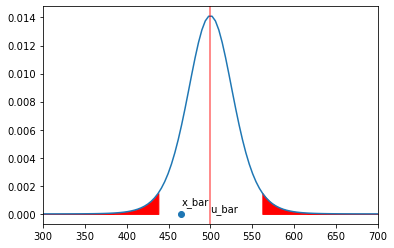

In [95]:

# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 300
x_max = 700


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size **0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df,mean, std)
plt.fill_between(x1, y1, color='red')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df,mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.axvline(pop_mean,alpha=0.6,c='r')
plt.annotate('u_bar', (pop_mean, 0.0002))
plt.annotate("x_bar", (sample_mean, 0.0007))

plt.show()
# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [96]:
# Conclusion using t test

if(np.abs(t_cal) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [97]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_cal)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818137
Fail to reject Null Hypothesis


**Q2)You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

### Solution

First we make a bold claim against a statement

Step - 1: Forming Null and Alternate Hypothesis

Alternate Hypothesis (Bold claim) $ H_1 $: Average User Rating greater than 4 i.e $\mu > 4$

Null Hypothesis (Status Quo) $ H_0 $ : Average User Rating less than or equal 4 i.e $\mu < = 4$

Step - 2:

Collect a sample of size n = 20$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$

Compute sample mean$$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: One tailed t-test:$$ reject \ H_0 if  t > t_critical $$

Step - 5.2: Compute p-value

In [98]:
sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [99]:
# Computing Sample Mean
sample_mean = sum(sample)/len(sample) #xbar

print(sample_mean)

4.25


In [100]:
# One tail

confidence_level2 = 0.95
alpha2 = 1 - confidence_level2
df2 = len(sample)-1
t_critical2 = t.ppf(1-alpha2, df2)

print(t_critical2)

1.729132811521367


In [101]:
# Defining the sample and population parameters

sample_size2 = 20
sample_mean2 = 4.25
pop_mean2 = 4
sample_std2 = st.stdev(sample)
sample_std2

0.8506963092234007

In [102]:
# Population Mean
pop_mean = 4 #given

Step - 3: Compute Test Statistic:

If population variance is unknown$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


In [103]:
# Calculating the t-score

t_cal2 = t_score(sample_size2, sample_mean2, pop_mean2, sample_std2)

print(t_cal2)

1.3142574813455419


Text(4.25, 0.1, 'x_bar')

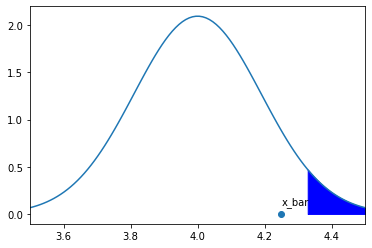

In [104]:

# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min2 = 3.5
x_max2 = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean2 = pop_mean2
std2 = sample_std2 / (sample_size2**0.5)


# Ploting the graph and setting the x limits
x2 = np.linspace(x_min2, x_max2, 100)
y2 = norm.pdf(x2, mean2, std2)
plt.xlim(x_min2, x_max2)
plt.plot(x2, y2)


# Computing the right critical value (Right tailed Test)
t_critical_right2 = pop_mean2 + (t_critical2 * std2)


# Shading the right rejection region
x3 = np.linspace(t_critical_right2, x_max2, 100)
y3 = norm.pdf(x3, mean2, std2)
plt.fill_between(x3, y3, color='blue')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean2, 0)
plt.annotate("x_bar", (sample_mean2, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [105]:
# Conclusion using t test

if(t_cal2 > t_critical2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [106]:
# Conclusion using p test

p_value2 = 1.0 - norm.cdf(np.abs(t_cal2))

print("p_value = ", p_value2)

if(p_value2 < alpha2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


## Question - 3

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

## Solution

First we make a bold claim against a statement

Step - 1: Forming Null and Alternate Hypothesis

Alternate Hypothesis (Bold claim) $ H_1 $: On average the SUV's mileage is at least 15 km/litre i.e $\mu > 15$

Null Hypothesis (Status Quo) $ H_0 $: On average the SUV's mileage is less than equal to 15 km/litre i.e $\mu < = 15$

Step - 2:

Collect a sample of size n = 20$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
Compute sample mean$$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

v=Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: One tailed t-test:$$ reject \ H_0 \ if \ t > t_{critical} $$

Step - 5.2: Compute p-value

In [107]:
Len3 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
sum(Len3)/len(Len3)

15.098999999999998

In [108]:
# One tail

confidence_level3 = 0.95
alpha3 = 1 - confidence_level3
df3 = len(Len3)-1
t_critical3 = t.ppf(1-alpha3, df3)

print(t_critical3)

1.729132811521367


In [109]:
# Defining the sample and population parameters

sample_size3 = 20
sample_mean3 = sum(Len3)/len(Len3)
pop_mean3 = 15
sample_std3 = st.stdev(Len3)
sample_std3

1.0253671999517258

In [110]:
# Calculating the t-score

t_cal3 = t_score(sample_size3, sample_mean3, pop_mean3, sample_std3)

print(t_cal3)

0.4317882018907915


Step - 4: Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

In [111]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

#Degree of freedom
df = sample_size-1

t_critical = t.ppf(1-alpha,df) # One tail t score for 95% Confidence Level

print(t_critical)

1.8331129326536335


Step - 5.1: Apply decision rule:



If test statistic is t-score
Two tailed t-test: $$|t|> t; t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Right tailed t-test:$$ t > ; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed t-test:$$ t <; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [112]:
# Conclusion using t test

if(t_cal3 > t_critical3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


tep - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now,$$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [113]:
# Conclusion using p test

p_value3 = 1.0 - norm.cdf(np.abs(t_cal3))

print("p_value = ", p_value3)

if(p_value3 < alpha3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33294767758235
Fail to reject Null Hypothesis


Text(15.098999999999998, 0.1, 'x_bar')

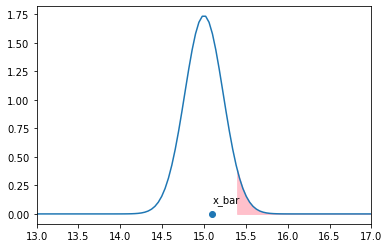

In [114]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min3 = 13
x_max3 = 17


# Defining the sampling distribution mean and sampling distribution std
mean3 = pop_mean3
std3 = sample_std3 / (sample_size3**0.5)


# Ploting the graph and setting the x limits
x4 = np.linspace(x_min3, x_max3, 100)
y4 = norm.pdf(x4, mean3, std3)
plt.xlim(x_min3, x_max3)
plt.plot(x4, y4)


# Computing the right critical value (Right tailed Test)
t_critical_right3 = pop_mean3 + (t_critical3 * std3)


# Shading the right rejection region
x5 = np.linspace(t_critical_right3, x_max3, 100)
y5 = norm.pdf(x5, mean3, std3)
plt.fill_between(x5, y5, color='pink')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean3, 0)
plt.annotate("x_bar", (sample_mean3, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesi


## Question 4

#### Q4): You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

## Solution

Step - 1: Alternate Hypothesis (Bold claim):$$ H_1: \ \mu < 100 $$

Null Hypothesis (Status Quo):$$ H_0: \ \mu >= 100 $$

Step - 2:

Collect a sample of size n = 20
Compute sample mean$$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: One tailed t-test: $$ reject \ H_0 \ if \ t >  t_{critical} $$

Step - 5.2: Compute p-value

In [115]:
sample_size=100
sample_mean=97.5
sample_std=7
population_mean=100

In [116]:
# One tail t-test calculating t critical value
alpha = 1 - 0.95
t_critical = t.ppf(1-alpha, df = 19)
print(t_critical)

1.729132811521367


In [117]:
# calculating t-score
t_stat=t_score(sample_size,sample_mean,population_mean,sample_std)
print("t score =",t_stat,sep=" ")

t score = -3.5714285714285716


Text(100, 0.02, 'x_bar')

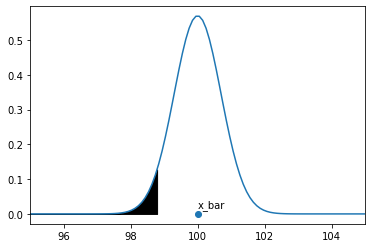

In [118]:
x_min4 = 95
x_max4 = 105

sample_mean = population_mean
std = sample_std / (sample_size**0.5)

x6 = np.linspace(x_min4, x_max4, 100)
y6 = norm.pdf(x6, sample_mean, std)

plt.xlim(x_min4, x_max4)
# plt.ylim(0, 0.03)

plt.plot(x6, y6)

t_critical_left= population_mean + (-t_critical * std)

x7 = np.linspace(x_min4, t_critical_left, 100)
y7 = norm.pdf(x7, sample_mean, std)
plt.fill_between(x7, y7, color='black')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [119]:
# Calculating the t-score

t_cal4 = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_cal4)

137.14285714285714


In [120]:
# Conclusion using t test

if(t_cal4 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [121]:
# Conclusion using p test

p_value4 = 1.0 - norm.cdf(np.abs(t_cal4))

print("p_value = ", p_value4)

if(p_value4 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


**Thankyou**